In [1]:
import pandas as pd


csv_file_path = 'specific_pairs.csv'

In [2]:

df =  pd.read_csv(csv_file_path)
df.head()



,Tool,k,w,GM+,D,DD,MC,OC,M
0,Kraken,15,17,1.578953,1.694088,1.582272,1.853190,1.631592,2.002050
1,Kraken 2,31,5,1.462202,1.999656,1.997226,1.757280,1.553502,2.000382
2,KMC 2 (1),7,22,1.698653,1.808467,1.808352,1.966615,1.903641,2.000356
3,KMC 2 (2),7,49,1.808632,1.904100,1.904100,1.979650,1.955700,1.994500
4,KMC 3,9,16,1.623596,1.685635,1.675911,1.925046,1.791358,2.000475


C:\Users\tzion\AppData\Local\Temp\ipykernel_40696\4144510357.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scheme = plt.cm.get_cmap("tab10")  # Use the tab10 colormap


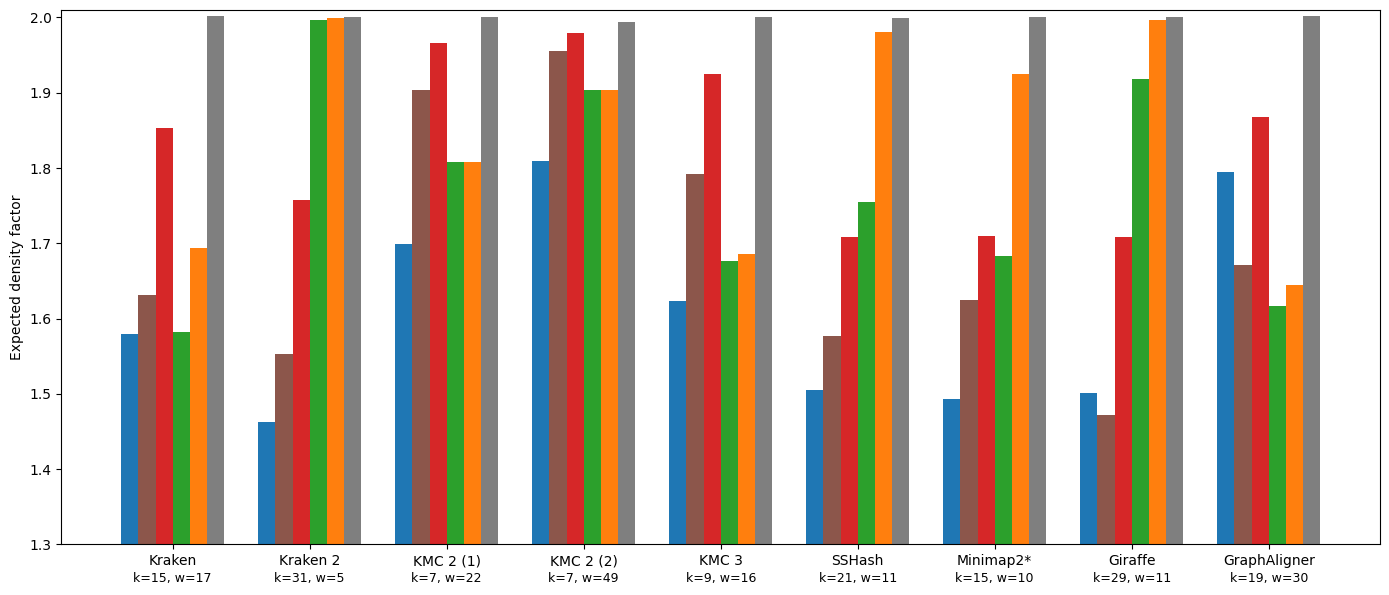

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting columns for the bar plot
columns_of_interest = ["GM+", "OC", "MC", "DD", "D", "M"]



df["Tool"] = df["Tool"].replace("Minimap 2", "Minimap2*")

# Creating a grouped bar plot
x = np.arange(len(df["Tool"])) * 1.2  # Increase spacing between groups

width = 0.15  # Width of each bar

color_scheme = plt.cm.get_cmap("tab10")  # Use the tab10 colormap
method_to_color = {
    "GM+": color_scheme(0),
    "OC": color_scheme(5),
    "MC": color_scheme(3),
    "DD": color_scheme(2),
    "D": color_scheme(1),
    "M": color_scheme(7),
}







# Main plot without legend
plt.figure(figsize=(14, 6))  # Increased figure width to allow more spacing
for idx, column in enumerate(columns_of_interest):
    plt.bar(
        x + idx * width, 
        df[column], 
        width, 
        label=column,
        color = method_to_color[column]
    )

# Adjusting x-ticks and labels
plt.xticks(
    x + width * (len(columns_of_interest) - 1) / 2,  # Center x-ticks
    df["Tool"], 
    fontsize=10
)

plt.ylim(1.3, 2.01)  # Set the range of the y-axis

plt.ylabel("Expected density factor")

# Adding k and w values below each bar group
for i, tool in enumerate(df["Tool"]):
    k_value = df.loc[i, "k"]
    w_value = df.loc[i, "w"]
    plt.text(
        x[i] + width * (len(columns_of_interest) - 1) / 2, 
        1.25,  # Adjusted vertical position
        f"k={k_value}, w={w_value}", 
        ha='center', 
        fontsize=9, 
        transform=plt.gca().transData
    )

# export as pdf
plt.tight_layout()

plt.savefig('specific_pairs.svg')




plt.show()


